Opening raw data file C:\Users\User\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Adding average EEG reference projection.
1 projection items deactivated
An average reference projection was already added. The data has been left untouched.


<ipython-input-16-82523c2e8c99>:6: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  raw = mne.io.read_raw_fif(op.join(data_path, 'sample_audvis_raw.fif'))
<ipython-input-16-82523c2e8c99>:7: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference()  # set EEG average reference


320 matching events found
Applying baseline correction (mode: mean)
add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Loading data for 320 events and 722 original time points ...


<ipython-input-16-82523c2e8c99>:13: DeprecationWarning: add_eeg_ref defaults to True in 0.13, will default to False in 0.14, and will be removed in 0.15. We recommend to use add_eeg_ref=False and set_eeg_reference() instead.
  epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=1.)


0 bad epochs dropped
Loading data for 20 events and 722 original time points ...


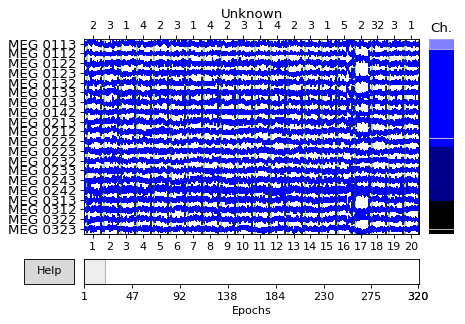

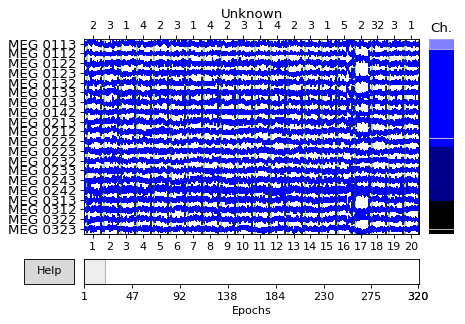

In [16]:
import os.path as op

import mne

data_path = op.join(mne.datasets.sample.data_path(), 'MEG', 'sample')
raw = mne.io.read_raw_fif(op.join(data_path, 'sample_audvis_raw.fif'))
raw.set_eeg_reference()  # set EEG average reference
event_id = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
            'visual/right': 4, 'smiley': 5, 'button': 32}
events = mne.read_events(op.join(data_path, 'sample_audvis_raw-eve.fif'))


epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=1.)

epochs.plot(block=True)

In [7]:
import numpy as np
import neo

import mne


sfreq = 1000  # Sampling frequency
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # Multiplied by 10 for shorter cycles
cos = np.cos(times * 10)
sinX2 = sin * 2
cosX2 = cos * 2

# Numpy array of size 4 X 10000.
data = np.array([sin, cos, sinX2, cosX2])

# Definition of channel types and names.
ch_types = ['mag', 'mag', 'grad', 'grad']
ch_names = ['sin', 'cos', 'sinX2', 'cosX2']

In [8]:
# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

Creating RawArray with float64 data, n_channels=4, n_times=10000
Current compensation grade : 0
    Range : 0 ... 9999 =      0.000 ...     9.999 secs
Ready.


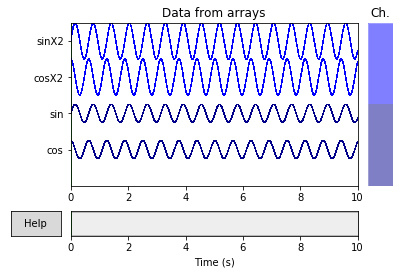

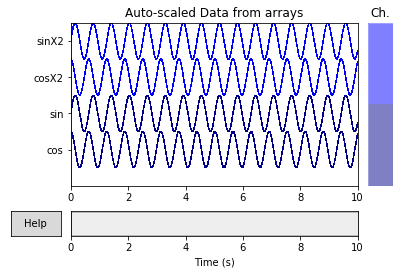

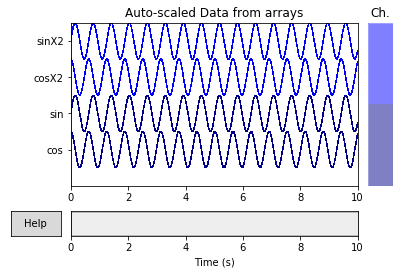

In [9]:
raw = mne.io.RawArray(data, info)

# Scaling of the figure.
# For actual EEG/MEG data different scaling factors should be used.
scalings = {'mag': 2, 'grad': 2}

raw.plot(n_channels=4, scalings=scalings, title='Data from arrays',
         show=True, block=True)

# It is also possible to auto-compute scalings
scalings = 'auto'  # Could also pass a dictionary with some value == 'auto'
raw.plot(n_channels=4, scalings=scalings, title='Auto-scaled Data from arrays',
         show=True, block=True)

In [13]:
data.shape

(4L, 10000L)